## Correct 1D LCT Including Units and Wavelength

In [8]:
import numpy as np
import time as tm
#import math
#import os 
#import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# import scipy.ndimage
# import scipy.ndimage as ip
# from srwlib import *
from LCTlib import *

# plt.style.available
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
# plt.style.use('Solarize_Light2')
hfontLarge = {'fontname':'Latin Modern Roman', 'size' : 24, 'weight' : 'bold'}
hfontMed = {'fontname':'Latin Modern Roman', 'size' : 15}

##### Construct 1D complex Gaussian

In [26]:
phLambda = 0.8e-6               # wavelength [m]; 0.8e-6 m = 800 nm or wavelength of Ti-Sapphire laser
k = 2 * np.pi / phLambda        # wave number
sigmax_gsn_init = 1.3e-3 / 2    # RMS beam size for initial Gsn (w0/2)
sigma_no_gsn_init = 6           # no. of sigmas for initial Gsn range
dist_waist = 0                  # distance from waist [m] (z in the notes)

z_R = 4 * np.pi * sigmax_gsn_init**2 / phLambda    # Rayleigh range 
q_gsn_init = dist_waist + 1j * z_R                 # complex beam parameter for initial Gsn
 
# construct x value array for initial Gsn    
ranx_gsn_init = sigma_no_gsn_init * sigmax_gsn_init   # mesh range for initial Gsn
nx_gsn_init = 100                                     # no. of mesh points for initial Gsn
xvals_gsn_init = np.linspace(-sigma_no_gsn_init * sigmax_gsn_init, sigma_no_gsn_init * sigmax_gsn_init, nx_gsn_init)

# construct initial complex Gsn field
E_field_gsn_init = (1 / np.sqrt(q_gsn_init)) * np.exp(-1j * k * np.square(xvals_gsn_init) / 2 / q_gsn_init) 

/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


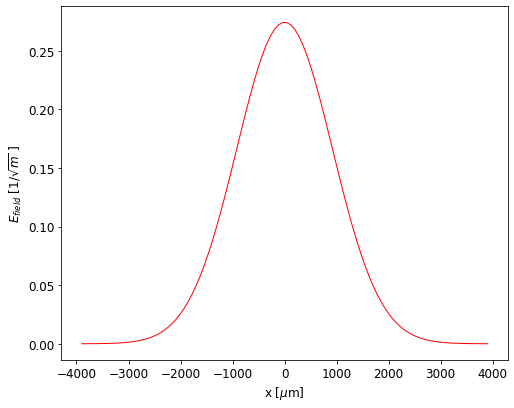

In [27]:
# plot initial complex Gsn
fig = plt.figure(figsize=(8,6.5))
ax = fig.gca()
ax.plot(xvals_gsn_init*1e6, E_field_gsn_init,'r-', lw = 1)
ax.set_xlabel(r'x [$\mu$m]')
ax.set_ylabel(r'$E_{field}$ [$1/\sqrt{m}$ ]')
fig.show()